# Housing Prices Dataset Analysis
## Exploring Housing Price Prediction Dataset using Pandas

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [5]:
df = pd.read_csv('Housing.csv')

print("=" * 60)
print("HOUSING MARKET ANALYSIS - DATA EXPLORATION")
print("=" * 60)

HOUSING MARKET ANALYSIS - DATA EXPLORATION


## Part 1: Initial Data Overview

In [6]:

print("\n📊 DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

print("\n🔍 FIRST 5 ROWS:")
print(df.head())

print("\n📈 BASIC INFO:")
print(df.info())

print("\n🧹 DATA QUALITY CHECK:")
print("Missing values per column:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())


📊 DATASET OVERVIEW
------------------------------
Dataset shape: (545, 13)
Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

🔍 FIRST 5 ROWS:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no     

## Part 2: Data Cleaning and Preprocessing

In [7]:
print("\n" + "=" * 60)
print("DATA CLEANING & PREPROCESSING")
print("=" * 60)

# converting price to millions for better readability
df['price_millions'] = df['price'] / 1_000_000

# Check data types and unique values for categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea', 'furnishingstatus']

print("\n📊 CATEGORICAL VARIABLES SUMMARY:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


DATA CLEANING & PREPROCESSING

📊 CATEGORICAL VARIABLES SUMMARY:
mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
prefarea: ['yes' 'no']
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


## Part 3: Comprehensive Statistical Analysis

In [8]:
print("\n" + "=" * 60)
print("DETAILED STATISTICAL ANALYSIS")
print("=" * 60)

# Focus on key numerical columns
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

def comprehensive_stats(series, name):
    """Calculate comprehensive statistics for a numerical series"""
    print(f"\n📊 {name.upper()} STATISTICS:")
    print("-" * 40)
    
    # Basic statistics
    print(f"Count: {series.count():,}")
    print(f"Mean: {series.mean():,.2f}")
    print(f"Median: {series.median():,.2f}")
    print(f"Mode: {series.mode().iloc[0]:,.2f}")
    print(f"Standard Deviation: {series.std():,.2f}")
    print(f"Variance: {series.var():,.2f}")
    print(f"Minimum: {series.min():,.2f}")
    print(f"Maximum: {series.max():,.2f}")
    print(f"Range: {series.max() - series.min():,.2f}")
    
    # Advanced statistics
    print(f"Skewness: {series.skew():.3f}")
    print(f"Kurtosis: {series.kurt():.3f}")
    
    # Quartiles and IQR
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    print(f"Q1 (25th percentile): {q1:,.2f}")
    print(f"Q3 (75th percentile): {q3:,.2f}")
    print(f"IQR: {iqr:,.2f}")
    
    # Outlier detection using IQR method
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    print(f"Potential outliers: {len(outliers)} ({len(outliers)/len(series)*100:.1f}%)")
    
    return {
        'mean': series.mean(),
        'median': series.median(),
        'std': series.std(),
        'skew': series.skew(),
        'kurt': series.kurt(),
        'outliers': len(outliers)
    }

# Analyze key numerical variables
stats_summary = {}
for col in ['price', 'area', 'bedrooms']:
    stats_summary[col] = comprehensive_stats(df[col], col)



DETAILED STATISTICAL ANALYSIS

📊 PRICE STATISTICS:
----------------------------------------
Count: 545
Mean: 4,766,729.25
Median: 4,340,000.00
Mode: 3,500,000.00
Standard Deviation: 1,870,439.62
Variance: 3,498,544,355,820.57
Minimum: 1,750,000.00
Maximum: 13,300,000.00
Range: 11,550,000.00
Skewness: 1.212
Kurtosis: 1.960
Q1 (25th percentile): 3,430,000.00
Q3 (75th percentile): 5,740,000.00
IQR: 2,310,000.00
Potential outliers: 15 (2.8%)

📊 AREA STATISTICS:
----------------------------------------
Count: 545
Mean: 5,150.54
Median: 4,600.00
Mode: 6,000.00
Standard Deviation: 2,170.14
Variance: 4,709,512.06
Minimum: 1,650.00
Maximum: 16,200.00
Range: 14,550.00
Skewness: 1.321
Kurtosis: 2.751
Q1 (25th percentile): 3,600.00
Q3 (75th percentile): 6,360.00
IQR: 2,760.00
Potential outliers: 12 (2.2%)

📊 BEDROOMS STATISTICS:
----------------------------------------
Count: 545
Mean: 2.97
Median: 3.00
Mode: 3.00
Standard Deviation: 0.74
Variance: 0.54
Minimum: 1.00
Maximum: 6.00
Range: 5.00
Ske

## Part 4: Advanced Analysis

In [9]:
print("\n" + "=" * 60)
print("ADVANCED MARKET INSIGHTS")
print("=" * 60)

# Price analysis by key features
print("\n💰 PRICE ANALYSIS BY FEATURES:")
print("-" * 40)

# Price by furnishing status
print("\n🏠 Average Price by Furnishing Status:")
furnishing_prices = df.groupby('furnishingstatus')['price'].agg(['mean', 'median', 'count'])
print(furnishing_prices)

# Price by main road access
print("\n🛣️ Average Price by Main Road Access:")
mainroad_prices = df.groupby('mainroad')['price'].agg(['mean', 'median', 'count'])
print(mainroad_prices)

# Price by number of bedrooms
print("\n🛏️ Average Price by Bedrooms:")
bedroom_prices = df.groupby('bedrooms')['price'].agg(['mean', 'median', 'count']).round(0)
print(bedroom_prices)

# Price per square foot analysis
df['price_per_sqft'] = df['price'] / df['area']
print(f"\n📐 Price per Square Foot:")
print(f"Average: ${df['price_per_sqft'].mean():,.2f}")
print(f"Median: ${df['price_per_sqft'].median():,.2f}")
print(f"Range: ${df['price_per_sqft'].min():,.2f} - ${df['price_per_sqft'].max():,.2f}")



ADVANCED MARKET INSIGHTS

💰 PRICE ANALYSIS BY FEATURES:
----------------------------------------

🏠 Average Price by Furnishing Status:
                          mean     median  count
furnishingstatus                                
furnished         5.495696e+06  5075000.0    140
semi-furnished    4.907524e+06  4585000.0    227
unfurnished       4.013831e+06  3430000.0    178

🛣️ Average Price by Main Road Access:
                  mean     median  count
mainroad                                
no        3.398905e+06  3290000.0     77
yes       4.991777e+06  4550000.0    468

🛏️ Average Price by Bedrooms:
               mean     median  count
bedrooms                             
1         2712500.0  2712500.0      2
2         3632022.0  3535000.0    136
3         4954598.0  4620000.0    300
4         5729758.0  5250000.0     95
5         5819800.0  5582500.0     10
6         4791500.0  4791500.0      2

📐 Price per Square Foot:
Average: $993.33
Median: $952.38
Range: $270.40 - $2,6

## Part 5: Correlation Analysis

In [10]:
print("\n" + "=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)

# Calculate correlations
correlation_matrix = df[numerical_cols].corr()
print("\n🔗 CORRELATION WITH PRICE:")
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlations)


CORRELATION ANALYSIS

🔗 CORRELATION WITH PRICE:
price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


## Part 6: Market Segmentation

In [11]:
print("\n" + "=" * 60)
print("MARKET SEGMENTATION")
print("=" * 60)

# Create price categories
def categorize_price(price):
    if price < 3000000:
        return 'Budget'
    elif price < 6000000:
        return 'Mid-Range'
    elif price < 9000000:
        return 'Premium'
    else:
        return 'Luxury'

df['price_category'] = df['price'].apply(categorize_price)

print("\n🏘️ MARKET SEGMENTS:")
segment_analysis = df.groupby('price_category').agg({
    'price': ['count', 'mean', 'median'],
    'area': 'mean',
    'bedrooms': 'mean'
}).round(2)

print(segment_analysis)


MARKET SEGMENTATION

🏘️ MARKET SEGMENTS:
               price                             area bedrooms
               count         mean     median     mean     mean
price_category                                                
Budget            71   2506290.85  2590000.0  3627.63     2.61
Luxury            17  10453882.35  9870000.0  8061.18     3.76
Mid-Range        357   4285442.16  4200000.0  4903.25     2.92
Premium          100   7123019.40  6912500.0  6619.84     3.25


## Part 7: Data Visualization


GENERATING VISUALIZATIONS


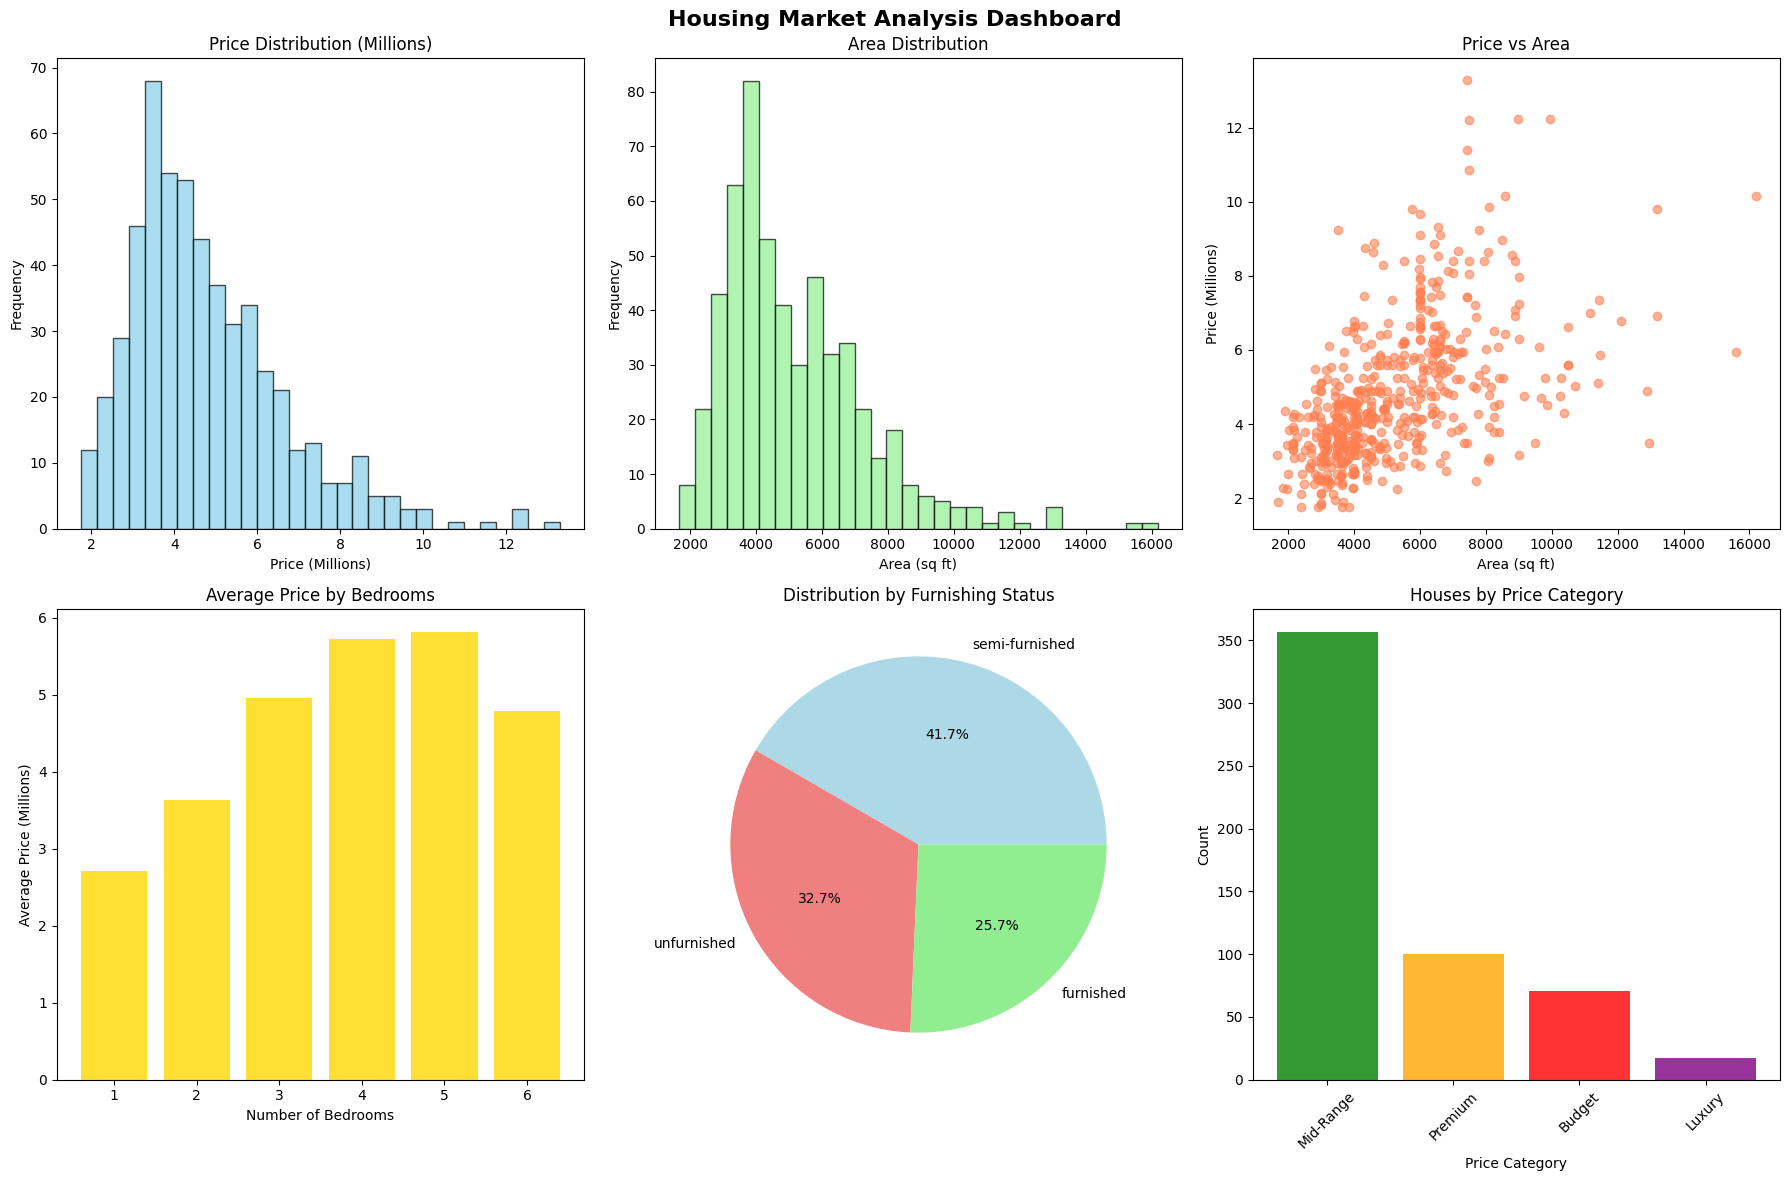

In [12]:
print("\n" + "=" * 60)
print("GENERATING VISUALIZATIONS")
print("=" * 60)

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Housing Market Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Price distribution
axes[0, 0].hist(df['price']/1000000, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Price Distribution (Millions)')
axes[0, 0].set_xlabel('Price (Millions)')
axes[0, 0].set_ylabel('Frequency')

# 2. Area distribution
axes[0, 1].hist(df['area'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Area Distribution')
axes[0, 1].set_xlabel('Area (sq ft)')
axes[0, 1].set_ylabel('Frequency')

# 3. Price vs Area scatter
axes[0, 2].scatter(df['area'], df['price']/1000000, alpha=0.6, color='coral')
axes[0, 2].set_title('Price vs Area')
axes[0, 2].set_xlabel('Area (sq ft)')
axes[0, 2].set_ylabel('Price (Millions)')

# 4. Price by bedrooms
bedroom_means = df.groupby('bedrooms')['price'].mean()/1000000
axes[1, 0].bar(bedroom_means.index, bedroom_means.values, color='gold', alpha=0.8)
axes[1, 0].set_title('Average Price by Bedrooms')
axes[1, 0].set_xlabel('Number of Bedrooms')
axes[1, 0].set_ylabel('Average Price (Millions)')

# 5. Furnishing status analysis
furnish_counts = df['furnishingstatus'].value_counts()
axes[1, 1].pie(furnish_counts.values, labels=furnish_counts.index, autopct='%1.1f%%', 
               colors=['lightblue', 'lightcoral', 'lightgreen'])
axes[1, 1].set_title('Distribution by Furnishing Status')

# 6. Price categories
price_cat_counts = df['price_category'].value_counts()
axes[1, 2].bar(price_cat_counts.index, price_cat_counts.values, 
               color=['green', 'orange', 'red', 'purple'], alpha=0.8)
axes[1, 2].set_title('Houses by Price Category')
axes[1, 2].set_xlabel('Price Category')
axes[1, 2].set_ylabel('Count')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Part 8: Summary Statistics Table

In [13]:
print("\n" + "=" * 60)
print("EXECUTIVE SUMMARY TABLE")
print("=" * 60)

summary_stats = pd.DataFrame({
    'Metric': ['Total Houses', 'Average Price', 'Median Price', 'Price Std Dev', 
               'Average Area', 'Median Area', 'Most Common Bedrooms', 
               'Furnished Houses (%)', 'Main Road Access (%)'],
    'Value': [
        f"{len(df):,}",
        f"${df['price'].mean():,.0f}",
        f"${df['price'].median():,.0f}",
        f"${df['price'].std():,.0f}",
        f"{df['area'].mean():,.0f} sq ft",
        f"{df['area'].median():,.0f} sq ft",
        f"{df['bedrooms'].mode().iloc[0]:.0f}",
        f"{(df['furnishingstatus'] == 'furnished').mean()*100:.1f}%",
        f"{(df['mainroad'] == 'yes').mean()*100:.1f}%"
    ]
})

print(summary_stats.to_string(index=False))

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE!")
print("=" * 60)


EXECUTIVE SUMMARY TABLE
              Metric       Value
        Total Houses         545
       Average Price  $4,766,729
        Median Price  $4,340,000
       Price Std Dev  $1,870,440
        Average Area 5,151 sq ft
         Median Area 4,600 sq ft
Most Common Bedrooms           3
Furnished Houses (%)       25.7%
Main Road Access (%)       85.9%

ANALYSIS COMPLETE!
